In [ ]:
# Date_Analysis;  EDA ; Maps; Prediction

In [ ]:
# "Date_Analysis"

In [ ]:
!pip install pyqt5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 12.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import PyQt5   # For displaying graphs in a new window (Doesn't work on Virtual Env)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Crimes_-_2001_to_Present.zip')
print('File Read Succesfully')

File Read Succesfully


In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
8077146,13047495,JG229914,2023-04-18 08:00:00,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8077147,13168300,JG373901,2023-08-07 18:00:00,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8077148,13114024,JG309527,2023-06-20 19:00:00,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8077149,13188860,JG398340,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"
8077150,13126372,JG324067,2023-07-01 19:29:00,005XX S WELLS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,34.0,32.0,14,1174805.0,1897873.0,2023,08/19/2023 03:40:26 PM,41.875155,-87.633649,"(41.87515458, -87.633648765)"


In [ ]:
data.index= pd.DatetimeIndex(data.Date)
data.index = pd.to_datetime(data.index)

In [ ]:
data['Primary Type'] = pd.Categorical(data['Primary Type'])
data['Description'] = pd.Categorical(data['Description'])
data['Location Description'] = pd.Categorical(data['Location Description'])

In [ ]:
data['Primary Type']

Date
2007-08-25 09:22:18                ASSAULT
2021-05-24 15:06:00               HOMICIDE
2021-06-26 09:24:00               HOMICIDE
2023-11-09 07:30:00               BURGLARY
2023-11-12 07:59:00                BATTERY
                              ...         
2023-04-18 08:00:00     DECEPTIVE PRACTICE
2023-08-07 18:00:00                ROBBERY
2023-06-20 19:00:00    MOTOR VEHICLE THEFT
2023-08-26 00:00:00        CRIMINAL DAMAGE
2023-07-01 19:29:00        CRIMINAL DAMAGE
Name: Primary Type, Length: 8077151, dtype: category
Categories (36, object): ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', ..., 'SEX OFFENSE',
                          'STALKING', 'THEFT', 'WEAPONS VIOLATION']

In [ ]:
data.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-18 08:00:00,13047495,JG229914,2023-04-18 08:00:00,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
2023-08-07 18:00:00,13168300,JG373901,2023-08-07 18:00:00,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
2023-06-20 19:00:00,13114024,JG309527,2023-06-20 19:00:00,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
2023-08-26 00:00:00,13188860,JG398340,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"
2023-07-01 19:29:00,13126372,JG324067,2023-07-01 19:29:00,005XX S WELLS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,...,34.0,32.0,14,1174805.0,1897873.0,2023,08/19/2023 03:40:26 PM,41.875155,-87.633649,"(41.87515458, -87.633648765)"


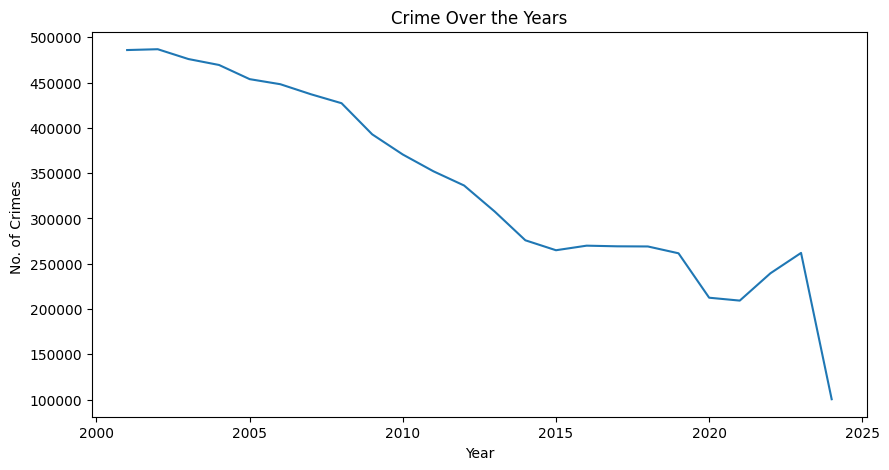

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.year]).size().plot.line()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Crimes ')
plt.show()

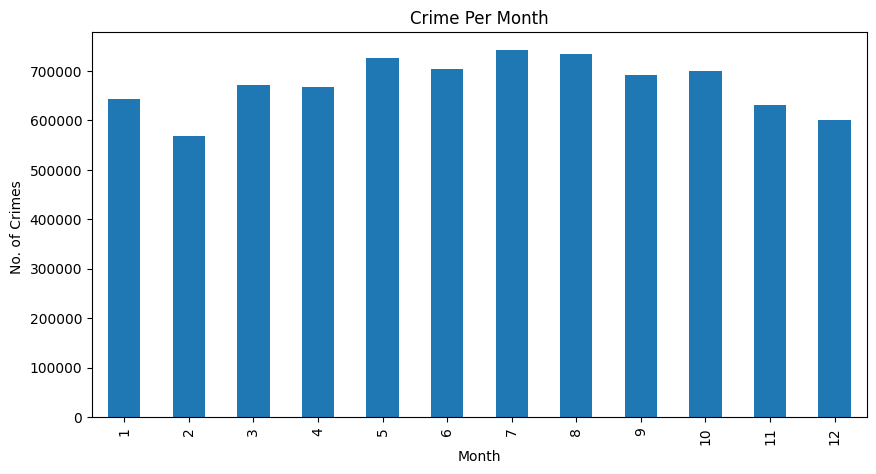

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('No. of Crimes ')
plt.show()

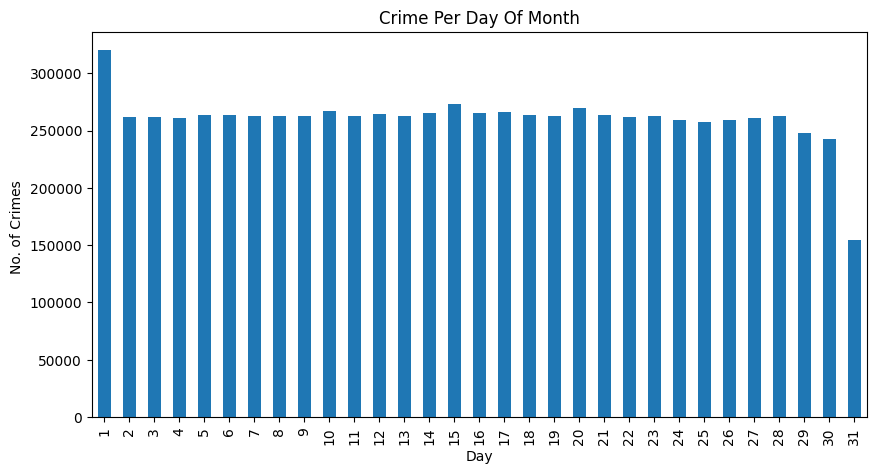

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('No. of Crimes ')
plt.show()

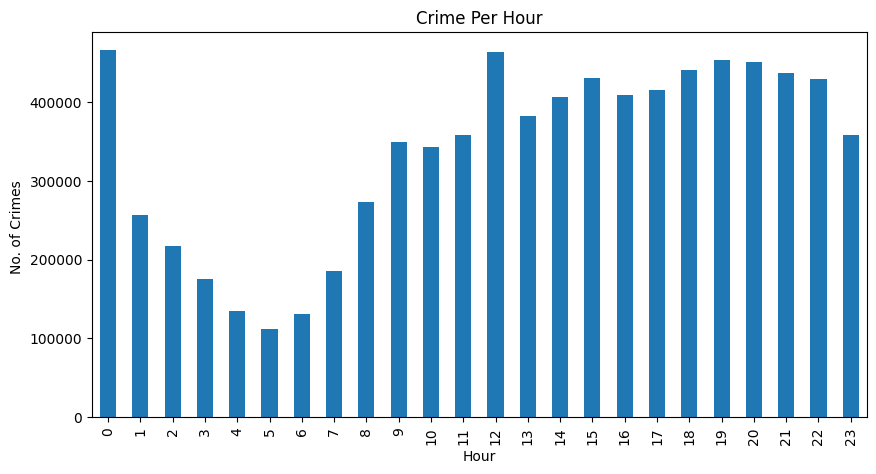

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('No. of Crimes ')
# %matplotlib qt                    //This command doesn't work on virtual environments like Google Colabs
plt.show()

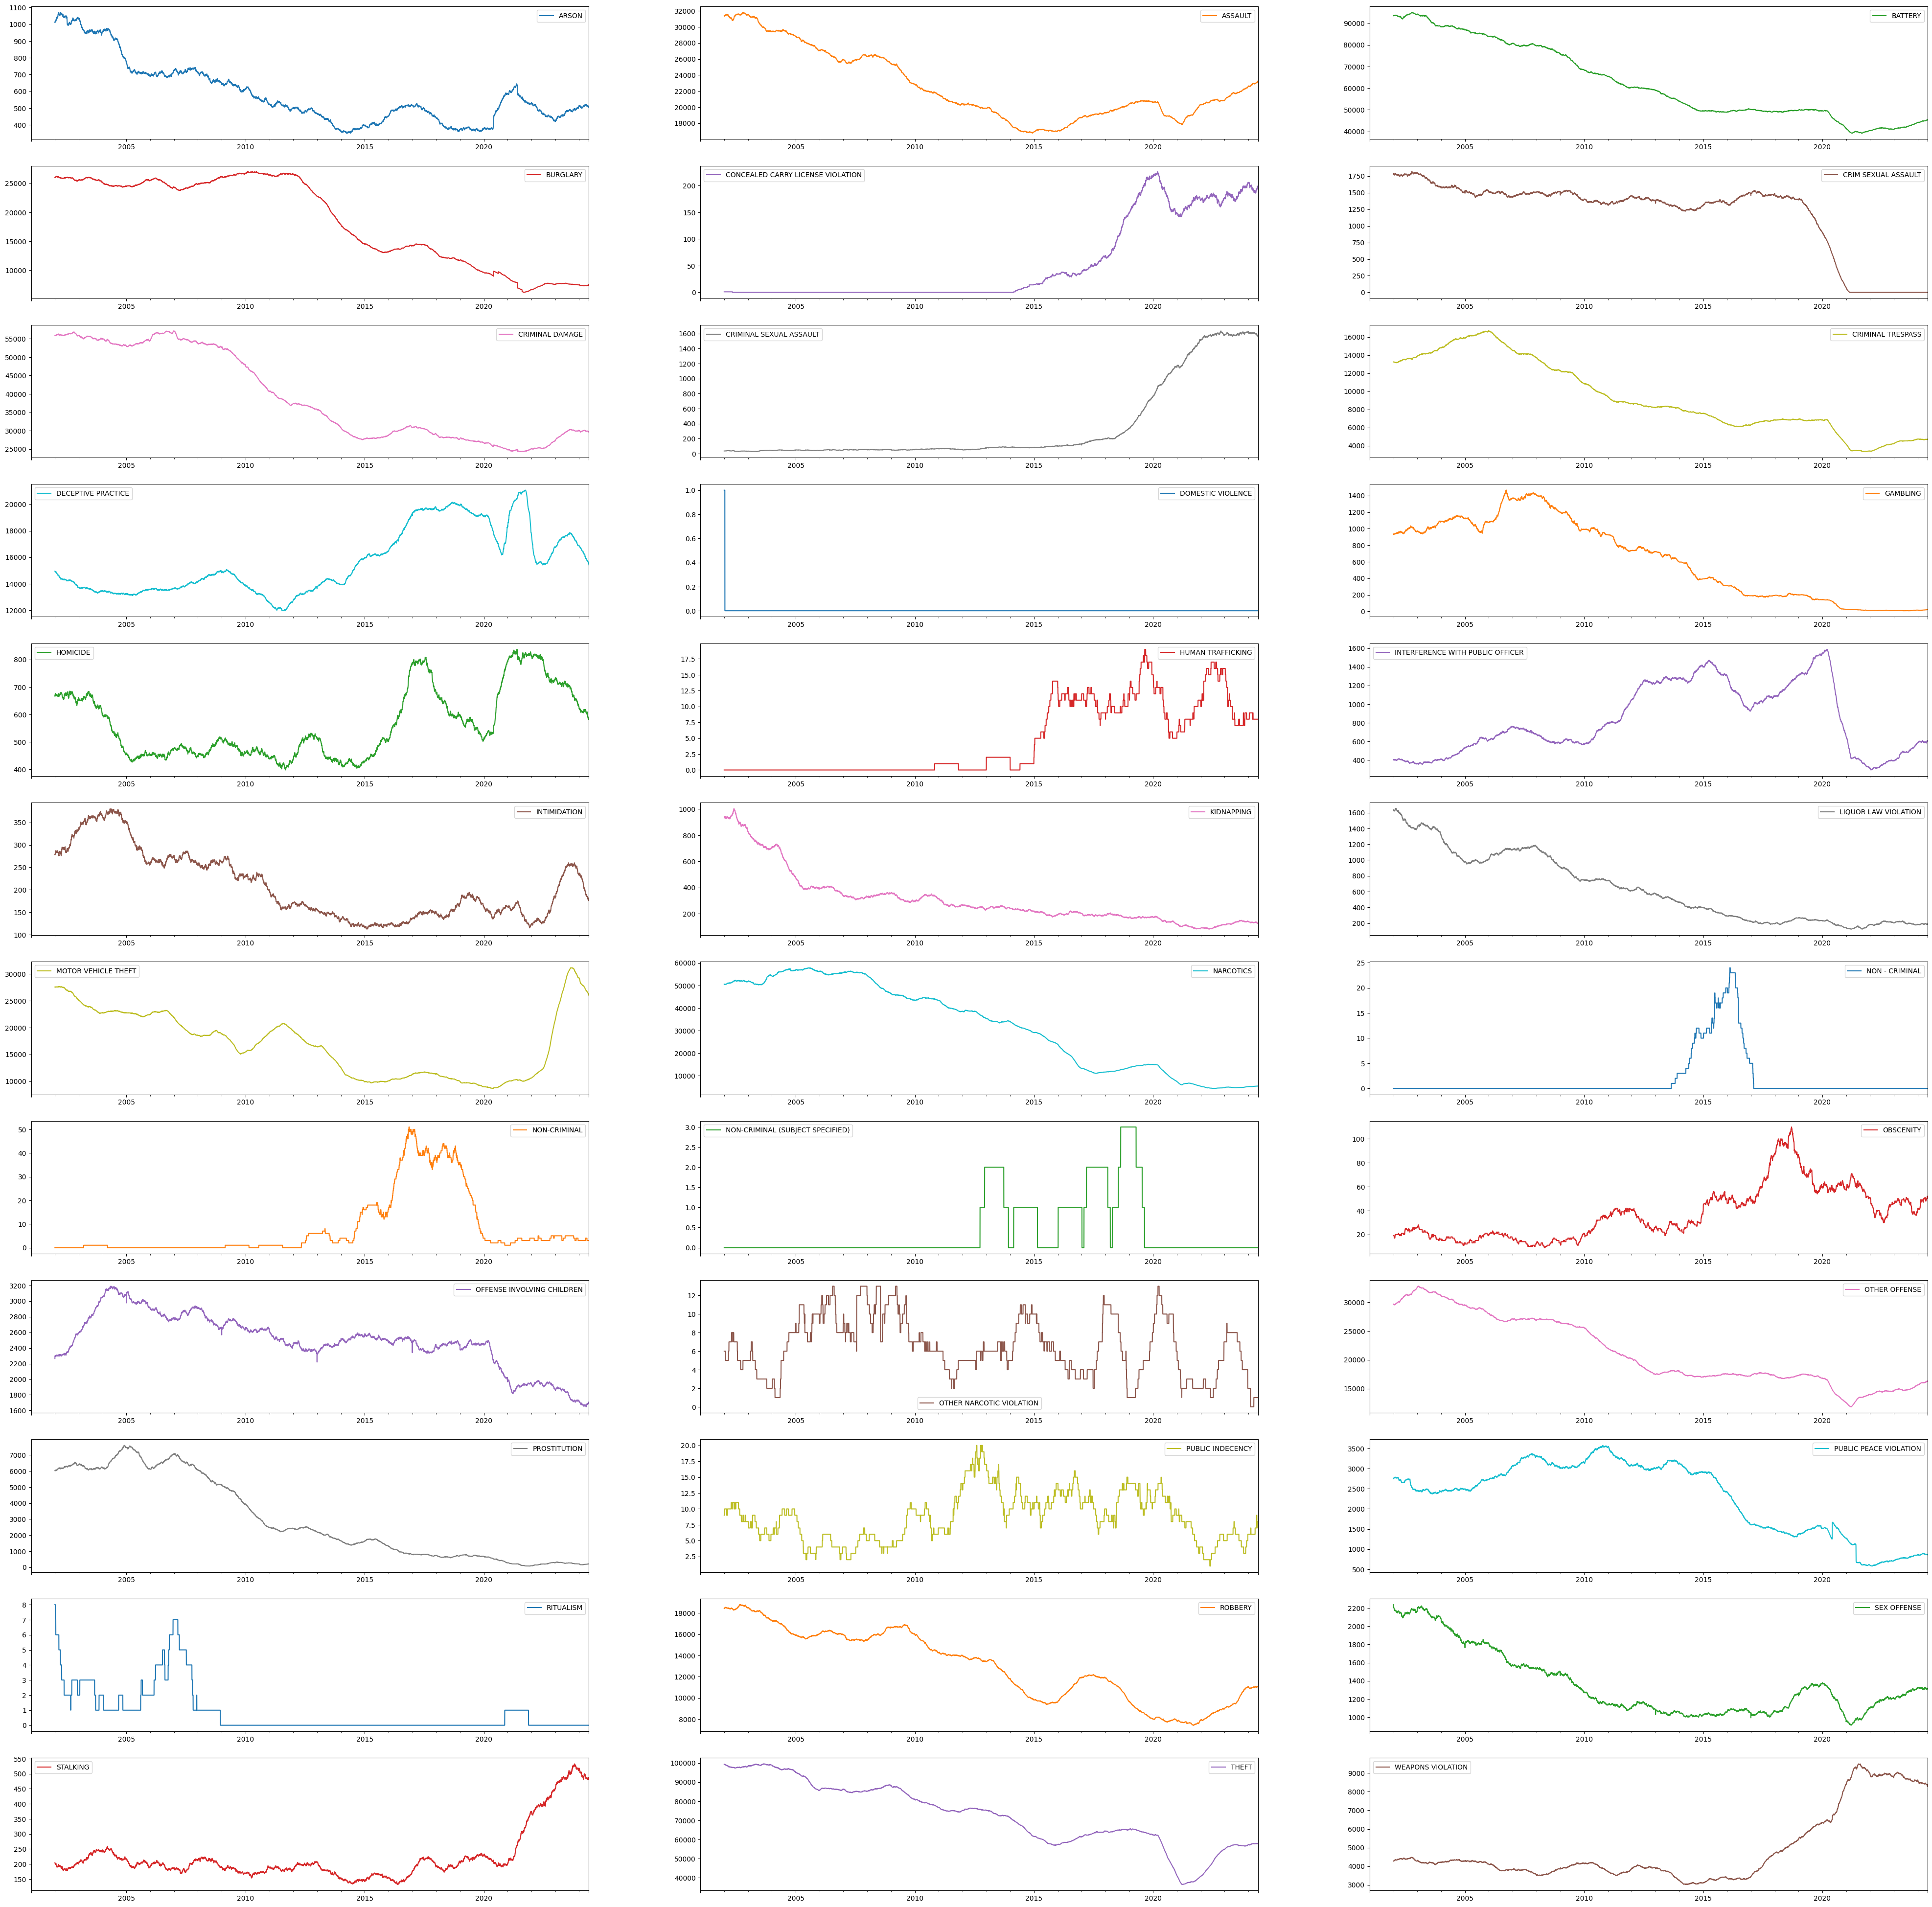

In [ ]:
crimes_count_date = data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(50, 50), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
# %matplotlib qt                    //This command doesn't work on virtual environments like Google Colabs

In [ ]:
#"EDA"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv(r'/content/Crimes_-_2001_to_Present.csv')
data.info()
data.head()

<ipython-input-20-45c01a822dea>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'/content/Crimes_-_2001_to_Present.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298448 entries, 0 to 298447
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    298448 non-null  int64  
 1   Case Number           298448 non-null  object 
 2   Date                  298448 non-null  object 
 3   Block                 298448 non-null  object 
 4   IUCR                  298448 non-null  object 
 5   Primary Type          298448 non-null  object 
 6   Description           298447 non-null  object 
 7   Location Description  296774 non-null  object 
 8   Arrest                298447 non-null  object 
 9   Domestic              298447 non-null  object 
 10  Beat                  298447 non-null  float64
 11  District              298447 non-null  float64
 12  Ward                  209600 non-null  float64
 13  Community Area        209971 non-null  float64
 14  FBI Code              298447 non-null  object 
 15  

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021.0,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021.0,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023.0,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023.0,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [ ]:
data.isnull().sum()/ len(data) * 100

ID                       0.000000
Case Number              0.000000
Date                     0.000000
Block                    0.000000
IUCR                     0.000000
Primary Type             0.000000
Description              0.000335
Location Description     0.560902
Arrest                   0.000335
Domestic                 0.000335
Beat                     0.000335
District                 0.000335
Ward                    29.770010
Community Area          29.645700
FBI Code                 0.000335
X Coordinate             1.847893
Y Coordinate             1.847893
Year                     0.000335
Updated On               0.000335
Latitude                 1.847893
Longitude                1.847893
Location                 1.847893
dtype: float64

In [ ]:
#plt.figure(figsize=(10,7))
#sns.heatmap(data.isnull(),cbar =False, cmap = 'viridis')

In [ ]:

data=data.dropna()

In [ ]:
#Defining plot_counts
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq", color_continuous_scale=px.colors.sequential.OrRd)
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    #fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()

In [ ]:
#Frequency by Primary Type
plot_counts(data["Primary Type"], "Kind of Crimes")

In [ ]:
#Frequency by Location
plot_counts(data["Location Description"], "Location of Crimes")

In [ ]:
#Frequency by Description of Crimes
plot_counts(data["Description"], "Description of Crimes")

In [ ]:
#*Chances of someone getting arrested crimewise*

In [ ]:
import pandas as pd
import plotly.express as px

data = pd.read_csv(r'/content/Crimes_-_2001_to_Present.csv')

aux = data.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = (aux['Arrest']*100).round(2).astype(str) + '%'
aux.sort_values('Arrest', inplace=True)

fig = px.bar(
    aux,
    orientation='h',
    x="Arrest (%)",
    y="Primary Type",
    color="Arrest",
    text="Arrest (%)",
    height=800,
    width=1200,
    color_continuous_scale=px.colors.sequential.OrRd
)

fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")
fig.show()


In [ ]:
aux = data.groupby('Primary Type')['Arrest'].mean()#.reset_index()
aux

Primary Type
ARSON                                0.166809
ASSAULT                              0.174448
BATTERY                              0.200581
BURGLARY                             0.063589
CONCEALED CARRY LICENSE VIOLATION    0.946154
CRIM SEXUAL ASSAULT                  0.231325
CRIMINAL DAMAGE                      0.065905
CRIMINAL SEXUAL ASSAULT              0.075912
CRIMINAL TRESPASS                    0.648420
DECEPTIVE PRACTICE                   0.161473
DOMESTIC VIOLENCE                    1.000000
GAMBLING                             0.997067
HOMICIDE                             0.472019
HUMAN TRAFFICKING                    0.200000
INTERFERENCE WITH PUBLIC OFFICER     0.853138
INTIMIDATION                         0.150150
KIDNAPPING                           0.134667
LIQUOR LAW VIOLATION                 0.992706
MOTOR VEHICLE THEFT                  0.079739
NARCOTICS                            0.993330
NON-CRIMINAL                         0.000000
OBSCENITY            

In [ ]:
@interact
def describe(DISTRICT=list(sorted(data['District'].unique()))):
    p2=data[data['District']==DISTRICT]['Block']
    global t1
    t1=DISTRICT
    plt.figure(figsize=(10,10))

    sns.countplot(y=p2,data=data,order = p2.value_counts().iloc[:30].index,palette='autumn')
    plt.title('Total crimes in District  ')
    plt.show()

interactive(children=(Dropdown(description='DISTRICT', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15,…

In [ ]:
@interact
def describe(column=list(sorted(data[data['District']==t1]['Block'].unique()))):
    p3=data[data['Block']==column]['Location Description']
    plt.figure(figsize=(10,10))
    sns.countplot(y=p3,data=data,order = p3.value_counts().iloc[:30].index,palette='autumn')
    plt.title('total crimes')
    plt.show()

interactive(children=(Dropdown(description='column', options=('0000X E 11 ST', '0000X E 11TH ST', '0000X E 13 …

In [ ]:
# "Maps"

In [ ]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv(r'/content/Crimes_-_2001_to_Present.csv')
print('File Read Succesfully')

File Read Succesfully


In [ ]:
data=data.dropna()

In [ ]:
data[['District', 'Ward','Community Area']] = data[['District', 'Ward','Community Area']].astype('int')
data[['District', 'Ward','Community Area']] = data[['District', 'Ward','Community Area']].astype('str')

In [ ]:
data.columns= data.columns.str.strip().str.lower().str.replace(' ','_')

In [ ]:
style_function = lambda x: {'fillColor': '#ffffff',
                            'color':'#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000',
                                'color':'#000000',
                                'fillOpacity': 0.50,
                                'weight': 0.1}

In [ ]:
#Wards
ward_geo = r'https://data.cityofchicago.org/api/geospatial/sp34-6z76?method=export&format=GeoJSON'

WardData = pd.DataFrame(data['ward'].value_counts(ascending=True).astype(float))
WardData = WardData.reset_index()
WardData.columns = ['ward', 'Crime_Count']

#myscale = (WardData['Crime_Count'].quantile((0, 0.50, 0.65, 0.90, 0.98, 1))).tolist()

map1 = folium.Map(location=[41.815117282, -87.669999562], zoom_start=11,)# tiles='')
map1.choropleth(geo_data = ward_geo,
                data = WardData,
                columns = ['ward', 'Crime_Count'],
                key_on = 'feature.properties.ward',
                fill_color = 'Reds',
                fill_opacity = 0.7,
                line_opacity = 0.2,
                #tooltip = 'hi',
                #threshold_scale=myscale, #[0, 50000, 100000, 150000, 200000, 300000],
                highlight=True,
                legend_name = 'Number of incidents per police ward')
feature = folium.features.GeoJson(
        ward_geo,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(
            fields=[
                'ward',
            ],
            aliases=[
                "Ward Number: ",
            ],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
            )
        )

map1.add_child(feature)
map1.keep_in_front(feature)


map1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Districts
district_geo = r'https://data.cityofchicago.org/api/geospatial/fthy-xz3r?method=export&format=GeoJSON'

#calculating total number of incidents per district
DisData = pd.DataFrame(data['district'].value_counts(ascending=True).astype(float))
DisData = DisData.reset_index()


DisData.columns = ['district', 'Crime_Count']

#myscale = (DisData['Crime_Count'].quantile((0,0.40,0.60,0.9,0.98,1))).tolist()

map2 = folium.Map(location=[41.815117282, -87.669999562], zoom_start=11, )#tiles='Mapbox Bright')
map2.choropleth(geo_data = district_geo,
                data = DisData,
                columns = ['district', 'Crime_Count'],
                key_on = 'feature.properties.dist_num',
                fill_color = 'Reds',
                fill_opacity = 0.7,
                line_opacity = 0.2,
                #threshold_scale=myscale,
                highlight=True,
                legend_name = 'Number of incidents per police district',

               )
feature = folium.features.GeoJson(
        district_geo,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(
            fields=[
                'dist_num',
                'dist_label',
            ],
            aliases=[
                "District Number: ",
                "District Label: "
            ],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
            )
        )


map2.add_child(feature)
map2.keep_in_front(feature)

map2

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Community Area
com_geo = r'https://data.cityofchicago.org/api/geospatial/cauq-8yn6?method=export&format=GeoJSON'

#calculating total number of incidents per district
ComData = pd.DataFrame(data['community_area'].value_counts().astype(float))
ComData = ComData.reset_index()
ComData.columns = ['community_area', 'Crime_Count']

#myscale = (DisData['Crime_Count'].quantile((0,0.40,0.60,0.9,0.98,1))).tolist()

map3 = folium.Map(location=[41.815117282, -87.669999562], zoom_start=11, tiles='https://api.mapbox.com/styles/v1/mapbox/bright-v10/tiles/{z}/{x}/{y}?access_token=pk.eyJ1IjoicmFqaWVzMjE3IiwiYSI6ImNrcmFkNWFyZzBjYzYycW56cDRsM2gzdmoifQ.8Q-IBqy4qS8dKlGn8j6UyA', attr='Map data &copy; <a href="https://www.mapbox.com/">Mapbox</a> contributors')
map3.choropleth(geo_data = com_geo,
                data = ComData,
                columns = ['community_area', 'Crime_Count'],
                key_on = 'feature.properties.area_numbe',
                fill_color = 'Reds',
                fill_opacity = 0.7,
                line_opacity = 0.2,
                #threshold_scale=myscale,
                highlight=True,
                legend_name = 'Number of incidents per police district')
feature = folium.features.GeoJson(
        com_geo,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(
            fields=[
                'area_numbe',
                'community',

            ],
            aliases=[
                "Area Number: ",
                "Name: "
            ],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
            )
        )


map3.add_child(feature)
map3.keep_in_front(feature)

map3


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#"Prediction"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

try:
    data = pd.read_csv('/content/Crimes_-_2001_to_Present.csv', skiprows=[1199060])
    print('File Read Successfully')
except pd.errors.ParserError as e:
    print(f'Error reading CSV file: {e}')


File Read Successfully


In [ ]:
data['Primary Type'].unique()

array(['ASSAULT', 'HOMICIDE', 'BURGLARY', 'BATTERY', 'THEFT',
       'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'CRIMINAL SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'SEX OFFENSE', 'OTHER OFFENSE', 'WEAPONS VIOLATION', 'STALKING',
       'CRIMINAL TRESPASS', 'PROSTITUTION', 'ARSON', 'NARCOTICS',
       'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'OBSCENITY', 'LIQUOR LAW VIOLATION', 'INTIMIDATION',
       'HUMAN TRAFFICKING', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'RITUALISM', 'DOMESTIC VIOLENCE'], dtype=object)

In [ ]:
data['voilent crime']=0
data['other crime']=0
data['sum_voilentcrime']=0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199059 entries, 0 to 1199058
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1199059 non-null  int64  
 1   Case Number           1199059 non-null  object 
 2   Date                  1199059 non-null  object 
 3   Block                 1199059 non-null  object 
 4   IUCR                  1199059 non-null  object 
 5   Primary Type          1199059 non-null  object 
 6   Description           1199059 non-null  object 
 7   Location Description  1197382 non-null  object 
 8   Arrest                1199059 non-null  bool   
 9   Domestic              1199059 non-null  bool   
 10  Beat                  1199059 non-null  int64  
 11  District              1199059 non-null  int64  
 12  Ward                  584330 non-null   float64
 13  Community Area        586785 non-null   float64
 14  FBI Code              1199059 non-

In [ ]:
voilent_crimes=['OFFENSE INVOLVING CHILDREN','CRIM SEXUAL ASSAULT','SEX OFFENSE','NARCOTICS','PROSTITUTION','CRIMINAL DAMAGE','ASSAULT','DOMESTIC VIOLENCE']

In [ ]:
for i in voilent_crimes:
    data.loc[data['Primary Type'] == i, 'voilent crime'] = 1

In [ ]:
other_crimes=['THEFT', 'OTHER OFFENSE',
        'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY']

In [ ]:
for i in other_crimes:
    data.loc[data['Primary Type'] == i, 'other crime'] = 1

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']=data['Date'].dt.normalize()

In [ ]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,voilent crime,other crime,sum_voilentcrime
0,5741943,HN549294,2007-08-25,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN,1,0,0
1,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",0,1,0
2,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",0,1,0
3,13279676,JG507211,2023-11-09,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)",0,1,0
4,13274752,JG501049,2023-11-12,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)",0,1,0


In [ ]:
r1=data['Date']
r1[0]

Timestamp('2007-08-25 00:00:00')

In [ ]:
r2=r1[0]-pd.Timedelta(days=2)
r2

Timestamp('2007-08-23 00:00:00')

In [ ]:
s1=data['Date'].value_counts()
s2=s1.keys()
s3={}
for i in s2:
    r5=[]
    r5.append(i)
    r1=data[data['Date']==i]['voilent crime']==1
    count=0
    for i in r1:
        if i==True:
            count+=1
    s3[r5[0]]=count
    data.loc[data['Date'] == r5[0], 'sum_voilentcrime'] = count

In [ ]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,voilent crime,other crime,sum_voilentcrime
0,5741943,HN549294,2007-08-25,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN,1,0,1
1,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",0,1,0
2,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",0,1,0
3,13279676,JG507211,2023-11-09,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)",0,1,171
4,13274752,JG501049,2023-11-12,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)",0,1,165


In [ ]:
data['sum_voilentcrime7']=0

In [ ]:
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)

    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0

In [ ]:
l1=0
j=2
while j<8:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0

        sum1[s2[i]]+=l1


    j+=1

In [ ]:
for i in sum1:

    data.loc[data['Date'] == i, 'sum_voilentcrime7'] = sum1[i]

In [ ]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,voilent crime,other crime,sum_voilentcrime,sum_voilentcrime7
0,5741943,HN549294,2007-08-25,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN,1,0,1,1
1,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",0,1,0,1
2,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",0,1,0,1
3,13279676,JG507211,2023-11-09,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)",0,1,171,1242
4,13274752,JG501049,2023-11-12,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)",0,1,165,1219


In [ ]:
data['sum_voilentcrime30']=0

In [ ]:
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)

    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0

In [ ]:
l1=0
j=2
while j<31:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0

        sum1[s2[i]]+=l1


    j+=1

In [ ]:
for i in sum1:

    data.loc[data['Date'] == i, 'sum_voilentcrime30'] = sum1[i]

In [ ]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,voilent crime,other crime,sum_voilentcrime,sum_voilentcrime7,sum_voilentcrime30
0,5741943,HN549294,2007-08-25,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN,1,0,1,1,4
1,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",0,1,0,1,15
2,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",0,1,0,1,26
3,13279676,JG507211,2023-11-09,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)",0,1,171,1242,5142
4,13274752,JG501049,2023-11-12,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)",0,1,165,1219,5220


In [ ]:
data['sum_voilentcrime120']=0
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)

    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0
l1=0
j=2
while j<121:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0

        sum1[s2[i]]+=l1


    j+=1

In [ ]:
for i in sum1:

    data.loc[data['Date'] == i, 'sum_voilentcrime120'] = sum1[i]

In [ ]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,voilent crime,other crime,sum_voilentcrime,sum_voilentcrime7,sum_voilentcrime30,sum_voilentcrime120
0,5741943,HN549294,2007-08-25,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,08/17/2015 03:03:40 PM,NaN,NaN,NaN,1,0,1,1,4,17
1,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",0,1,0,1,15,64
2,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",0,1,0,1,26,75
3,13279676,JG507211,2023-11-09,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)",0,1,171,1242,5142,11395
4,13274752,JG501049,2023-11-12,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)",0,1,165,1219,5220,11897


In [ ]:
data['sum_othercrime']=0
s1=data['Date'].value_counts()
s2=s1.keys()
s3={}
for i in s2:
    r5=[]
    r5.append(i)
    r1=data[data['Date']==i]['other crime']==1
    count=0
    for i in r1:
        if i==True:
            count+=1
    s3[r5[0]]=count
    data.loc[data['Date'] == r5[0], 'sum_othercrime'] = count

In [ ]:
data['sum_othercrime7']=0
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)

    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0
l1=0
j=2
while j<8:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0

        sum1[s2[i]]+=l1


    j+=1

In [ ]:
for i in sum1:

    data.loc[data['Date'] == i, 'sum_othercrime7'] = sum1[i]

In [ ]:
data['sum_othercrime30']=0
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)

    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0
l1=0
j=2
while j<31:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0

        sum1[s2[i]]+=l1


    j+=1

In [ ]:
for i in sum1:

    data.loc[data['Date'] == i, 'sum_othercrime30'] = sum1[i]

In [ ]:
data['sum_othercrime120']=0
t1=data['Date'].value_counts()
sum1={}
j=1

for i in s2:
    w2=i-pd.Timedelta(days=1)

    if w2 in s3:
        sum1[i]=s3[w2]
    else:sum1[i]=0
l1=0
j=2
while j<121:
    for i in range(len(s2)):
        w2=s2[i]-pd.Timedelta(days=j)
        if w2 in s3:
            l1=s3[w2]
        else:
            l1=0

        sum1[s2[i]]+=l1


    j+=1

In [ ]:
for i in sum1:

    data.loc[data['Date'] == i, 'sum_othercrime120'] = sum1[i]

In [ ]:
#-------------------------------------------------------------#

In [ ]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,voilent crime,other crime,sum_voilentcrime,sum_voilentcrime7,sum_voilentcrime30,sum_voilentcrime120,sum_othercrime,sum_othercrime7,sum_othercrime30,sum_othercrime120
0,5741943,HN549294,2007-08-25,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,1,0,1,1,4,17,2,19,61,224
1,25953,JE240540,2021-05-24,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,0,1,0,1,15,64,3,37,116,452
2,26038,JE279849,2021-06-26,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,0,1,0,1,26,75,6,29,134,497
3,13279676,JG507211,2023-11-09,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,0,1,171,1242,5142,11395,519,3970,16886,38050
4,13274752,JG501049,2023-11-12,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,0,1,165,1219,5220,11897,510,3785,16906,39596


In [ ]:
data=data.dropna() # error showed up if not run

In [ ]:
data["Latitude"].fillna(data["Latitude"].mean(), inplace = True)
data["Longitude"].fillna(data["Longitude"].mean(), inplace = True)

In [ ]:
split_date =data['Date'][77]
df_training = data.loc[data['Date'] <= split_date]
df_test = data.loc[data['Date'] > split_date]

In [ ]:
data['Date']

1         2021-05-24
2         2021-06-26
3         2023-11-09
4         2023-11-12
6         2023-09-06
             ...    
1199054   2003-04-11
1199055   2003-03-30
1199056   2003-03-25
1199057   2003-04-20
1199058   2003-03-25
Name: Date, Length: 570231, dtype: datetime64[ns]

In [ ]:
a=len(df_training)
b=len(df_test)
print((a/(a+b))*100)
print((b/(a+b))*100)
a,b,a+b

67.8339129230084
32.16608707699161


(386810, 183421, 570231)

In [ ]:
x_columns=['Latitude','Longitude','sum_voilentcrime7','sum_voilentcrime30','sum_voilentcrime120','sum_othercrime7','sum_othercrime30','sum_othercrime120']

y_columns=['voilent crime']

In [ ]:
x_train=df_training[x_columns]
x_test=df_test[x_columns]
y_train=df_training[y_columns]
y_test=df_test[y_columns]

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.760954307303962


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[139575      0]
 [ 43846      0]]
